In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randint
import scipy.stats as ss
#from scipy.stats import norm, kurtosis, skew
import itertools as itt
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plots
import importlib
#importlib.reload(plots)

# Z-tests with Hypothesis Two Populations
When we are looking to diffentiate or compare two distributions, there are two primary characteristics we can analyze
1. Their means
2. Their variances

## Example Call Center Comparison
Let's say you are the manager of two call centers near Bangalore, India. These centers focus on in-depth problem solving for clients, therefore the calls last approximately 12 minutes. Each location has its own employees, management and work culture.

As part of your performance analysis, you wish to see if there is a difference in the average call-length between both locations. The assumption is that the mean difference between the two locations is zero. That is, there is no difference in mean call length between the two call centers.

Call Center 1
- $\sigma_1$ = 1.2 minutes

Call Center 2
- $\sigma_2$ = 1.5 minutes

Assumption
- $\mu_1$ - $\mu_2$ = 0

Independence
- Two centers are independent of each other

## Hypothesis Formats and Regions
Two tailed test
- $H_O: \mu_1 - \mu_2 = D_O$ 
- $H_a: \mu_1 - \mu_2 \neq D_O$ 

One tailed upper
- $H_O: \mu_1 - \mu_2 \leq D_O$ 
- $H_a: \mu_1 - \mu_2 > D_O$ 

One tailed lower
- $H_O: \mu_1 - \mu_2 \geq D_O$ 
- $H_a: \mu_1 - \mu_2 < D_O$ 

## Call Center Hypothesis
The tentative assumption (null hypothesis) is that no difference exists between the mean call lengths at the two call centers; $D_O$

- $H_O: \mu_1 - \mu_2 = D_O$ 
- $H_a: \mu_1 - \mu_2 \neq D_O$ 

Significance Level: $\alpha = .05$

Since $\sigma$ is known, we will use the z-distribution in our test

Decision Rule:

Since $\alpha = .05$ and we are using the z-distribution, $H_O$ will be rejected if the test statistic > 1.96 or < 1.96

## Test Statistic for $\mu_1 - \mu_2$: $\sigma$'s Known

Test Statistic for a Single Mean

\begin{equation}
z = \frac{\bar x - \mu_O}{\frac{\sigma}{\sqrt{n}}}
\end{equation}

Test Statistic for the difference of two independent random samples

\begin{equation}
z = \frac{(\bar x_1 - \bar x_2) - D_O}{\sqrt{\frac{\sigma_{1}^2}{n} + \frac{\sigma_{2}^2}{n}}}
\end{equation}

$\mu_O$ = hypothesized population mean

$D_O$ = hypothesized difference between two population means

## Interval Estimate for $\bar d$

Interval Estimate for a single mean

$\bar x \pm$ margin of error

Interval Estimate for the difference of two independent random samples

margin of error
\begin{equation}
\frac{z_\alpha}{2} * \frac{\sigma}{\sqrt{n}}
\end{equation}

\begin{equation}
\bar x \pm \frac{z_\alpha}{2} * \frac{\sigma}{\sqrt{n}}
\end{equation}

$\bar d \pm$ margin of error

margin of error
\begin{equation}
\frac{z_\alpha}{2} * (\sqrt{\frac{\sigma_{1}^2}{n} + \frac{\sigma_{2}^2}{n}})
\end{equation}

\begin{equation}
\bar d \pm \frac{z_\alpha}{2} * (\sqrt{\frac{\sigma_{1}^2}{n} + \frac{\sigma_{2}^2}{n}})
\end{equation}


In [4]:
cc_df = pd.DataFrame({'-': ['Sample Size,n', r'$\sigma$'], 'Call Center 1': [30, 1.20], 'Call Center 2': [30, 1.50]})
cc_df

,-,Call Center 1,Call Center 2
0,"Sample Size,n",30.0,30.0
1,$\sigma$,1.2,1.5


\begin{equation}
\bar d \pm \frac{z_\alpha}{2} * (\sqrt{\frac{\sigma_{1}^2}{n} + \frac{\sigma_{2}^2}{n}}) \\
\bar d \pm 1.96 * (\sqrt{\frac{120^2}{30} + \frac{1.50^2}{30}}) \\
\bar d \pm 0.6874
\end{equation}


-


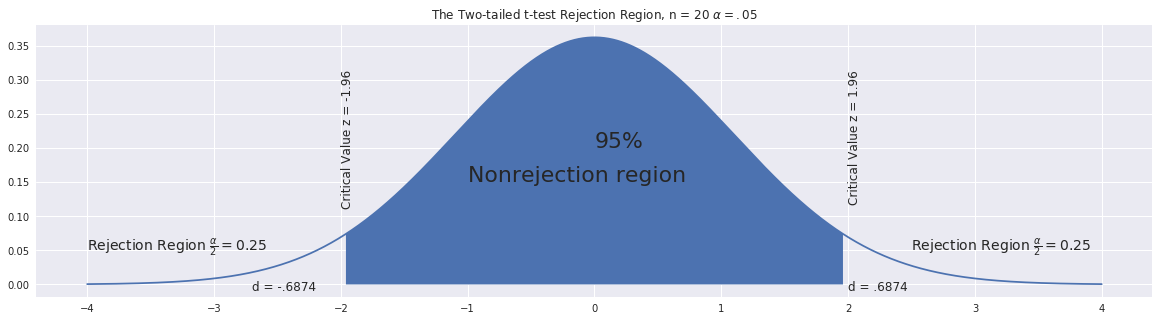

In [11]:
mu=0
sigma= 1.1
x = np.linspace(-4, 4, 5000)
y = ss.norm.pdf(x, mu, sigma)
P = plots.Plots(x,y)
fig2 = plt.figure(figsize=(20,5))
ax = fig2.add_subplot(1,1,1)
ax.plot(x,y)
ax.fill_between(x,y, where=(x < 1.96) & (x > -1.96))
ax.text(-4,.05, 'Rejection Region ' + r'$\frac{\alpha}{2}=0.25$', fontsize=14)
ax.text(2.5,.05, 'Rejection Region ' + r'$\frac{\alpha}{2}=0.25$', fontsize=14)
ax.text(-2,.3, 'Critical Value z = -1.96', fontsize=12, rotation = 90)
ax.text(2,.3, 'Critical Value z = 1.96', fontsize=12, rotation = 90)
ax.text(0,.2, '95%', fontsize=22)
ax.text(-1,.15, 'Nonrejection region', fontsize=22)
ax.text(-2.7,-.01, 'd = -.6874', fontsize=12, rotation = 0)
ax.text(2,-.01, 'd = .6874', fontsize=12, rotation = 0)

ax.set_title('The Two-tailed t-test Rejection Region, n = 20 ' + r'$\alpha = .05$')
print('-')

## Z-Statistic for Call Length

In [12]:
cc_df = pd.DataFrame({'-': ['Sample Size,n', 'Sample Mean, ' + r'$\bar x$',r'$\sigma$'], 'Call Center 1': [30, 11.91, 1.20], 'Call Center 2': [30, 12.02, 1.50]})
cc_df

,-,Call Center 1,Call Center 2
0,"Sample Size,n",30.00,30.00
1,"Sample Mean, $\bar x$",11.91,12.02
2,$\sigma$,1.20,1.50


\begin{equation}
z = \frac{(\bar x_1 - \bar x_2) - D_O}{\sqrt{\frac{\sigma_{1}^2}{n} + \frac{\sigma_{2}^2}{n}}} \\ 
z = \frac{(11.91 - 12.02) - 0}{\sqrt{\frac{1.20^2}{30} + \frac{1.50^2}{30}}} \\
z = \frac{-0.11}{.3507} = -0.31
\end{equation}

-


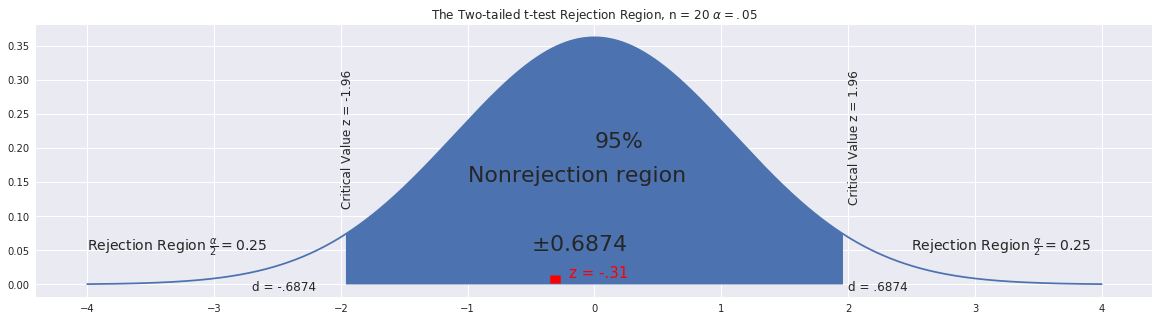

In [21]:
mu=0
sigma= 1.1
x = np.linspace(-4, 4, 5000)
y = ss.norm.pdf(x, mu, sigma)
P = plots.Plots(x,y)
fig2 = plt.figure(figsize=(20,5))
ax = fig2.add_subplot(1,1,1)
ax.plot(x,y)
ax.fill_between(x,y, where=(x < 1.96) & (x > -1.96))
ax.text(-4,.05, 'Rejection Region ' + r'$\frac{\alpha}{2}=0.25$', fontsize=14)
ax.text(2.5,.05, 'Rejection Region ' + r'$\frac{\alpha}{2}=0.25$', fontsize=14)
ax.text(-2,.3, 'Critical Value z = -1.96', fontsize=12, rotation = 90)
ax.text(2,.3, 'Critical Value z = 1.96', fontsize=12, rotation = 90)
ax.text(0,.2, '95%', fontsize=22)
ax.text(-1,.15, 'Nonrejection region', fontsize=22)
ax.text(-.5,.05, r'$\pm 0.6874$', fontsize=22)
ax.text(-2.7,-.01, 'd = -.6874', fontsize=12, rotation = 0)
ax.text(2,-.01, 'd = .6874', fontsize=12, rotation = 0)
ax.text(-.2,.01, 'z = -.31', fontsize=15, rotation = 0, color = 'red')
ax.axvline(-0.31, 0.05, 0.08, color='r', linestyle=':', linewidth =10.5)
ax.set_title('The Two-tailed t-test Rejection Region, n = 20 ' + r'$\alpha = .05$')
print('-')

Conclusion:
- Fail to reject $H_O$ - The sample results do not offer sufficient evidence to conclude the call centers differ in mean call length

# t-tests with Hypothesis Two Populations
When we are looking to diffentiate or compare two distributions, there are two primary characteristics we can analyze
1. Their means
2. Their variances

## Example Call Center Comparison
Let's say you are the manager of two call centers near Bangalore, India. These centers focus on in-depth problem solving for clients, therefore the calls last approximately 12 minutes. Each location has its own employees, management and work culture.

As part of your performance analysis, you wish to see if there is a difference in the average call-length between both locations. The assumption is that the mean difference between the two locations is zero. That is, there is no difference in mean call length between the two call centers.

A random sample of n = 30 will be taken from both call centers

Call Center 1
- $s_1$ = 1.2 minutes

Call Center 2
- $s_2$ = 1.5 minutes

Assumption
- $\mu_1$ - $\mu_2$ = 0

## Distribution of Differences $\mu_1 - \mu_2$
$\mu_1$ = mean call length for Call Center 1
$\mu_2$ = mean call length for Call Center 2

What we are really talking about:
1. Take an independent sample from $\mu_1$, population mean,  which will be $\bar x_1$, , sample mean
2. Take an independent sample from $\mu_2$,population mean, which will be $\bar x_2$, sample mean
3. $\bar x_1 - \bar x_2 = d_1$
4. Repeat step #1 and repeat

In [27]:
cc_tdf = pd.DataFrame({'Sample n=30': range(1,11), 
                       r'$x_1$': [11.91, 11.36, 11.75, 12.14, 11.72, 11.61, 11.85, 12.16, 11.91, 12.12], 
                       r'$x_2$': [12.02, 12.02, 12.05, 12.18, 12.11, 12.07, 12.05, 11.64, 12.39, 11.65], 
                       r'$d_i$': [-0.11, -0.66, -0.3, -0.04, -0.39, -0.46, -0.2, -0.52, -0.48, -0.47]})
cc_tdf.set_index('Sample n=30')

,$d_i$,$x_1$,$x_2$
Sample n=30,,,
1,-0.11,11.91,12.02
2,-0.66,11.36,12.02
3,-0.30,11.75,12.05
4,-0.04,12.14,12.18
5,-0.39,11.72,12.11
6,-0.46,11.61,12.07
7,-0.20,11.85,12.05
8,-0.52,12.16,11.64
9,-0.48,11.91,12.39


Mean call length in minutes

Each $d_i$ is a point estimate of $\mu_1 - \mu_2$

The $d_i$ values form a distribution of differences in the same way single sample means have a sampling distribution

$\bar d$ is the mean of the differences

## Standard error of $\bar d$, $\sigma$ unknown

Standard Error of the Mean
\begin{equation}
s_{\bar x} = \frac{s}{\sqrt{n}}
\end{equation}

Standard Error of the Differences for Two Independent Random Sample
\begin{equation}
s_{\bar x_1 - \bar x_2} = (\sqrt{\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2}}) \\
s_{\bar d}  = (\sqrt{\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2}}) \\
\end{equation}

## Interval Estimate for $\bar d$, $\sigma$ unknown

margin of error
\begin{equation}
t_{\frac{\alpha}{2}} * \frac{s}{\sqrt{n}}
\end{equation}

\begin{equation}
\bar x \pm t_{\frac{\alpha}{2}} * \frac{s}{\sqrt{n}}
\end{equation}

$\bar d \pm$ margin of error

margin of error
\begin{equation}
t_{\frac{\alpha}{2}} * (\sqrt{\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2}})
\end{equation}

\begin{equation}
\bar d \pm t_{\frac{\alpha}{2}} * (\sqrt{\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2}})
\end{equation}

## Degrees of Freedom Calculation

\begin{equation}
df = \frac
{
(\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2})
}
{
\frac{1}{n_1 -1}*(\frac{s_{1}^2}{n_1}) + \frac{1}{n_2 -1}*\frac{s_{2}^2}{n_2}
}
\end{equation}

## Interval Estimate for call Length
95% Confidence Interval
\begin{equation}
\bar d \pm t_{\frac{\alpha}{2}} * (\sqrt{\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2}}) \\
\bar d \pm 2.048 * (\sqrt{\frac{1.20^2}{30} + \frac{1.50^2}{30}}) \\
\bar d \pm 2.048(.3507) \\
\bar d \pm 0.7183
\end{equation}


In [28]:
cc_df = pd.DataFrame({'-': ['Sample Size,n', r'$\sigma$', 'df'], 'Call Center 1': [30, 1.20, r'$\alpha = .05$'], 'Call Center 2': [30, 1.50, r'$t_{crit} = \pm 2.048$']})
cc_df

,-,Call Center 1,Call Center 2
0,"Sample Size,n",30,30
1,$\sigma$,1.2,1.5
2,df,$\alpha = .05$,$t_{crit} = \pm 2.048$


-


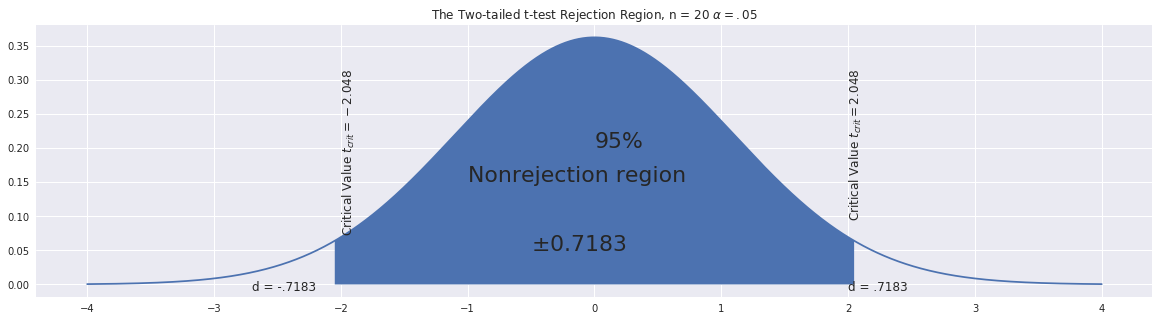

In [31]:
mu=0
sigma= 1.1
x = np.linspace(-4, 4, 5000)
y = ss.norm.pdf(x, mu, sigma)
P = plots.Plots(x,y)
fig2 = plt.figure(figsize=(20,5))
ax = fig2.add_subplot(1,1,1)
ax.plot(x,y)
ax.fill_between(x,y, where=(x < 2.048) & (x > -2.048))
ax.text(-2,.3, 'Critical Value ' + r'$t_{crit} = -2.048$', fontsize=12, rotation = 90)
ax.text(2,.3, 'Critical Value ' + r'$t_{crit} = 2.048$', fontsize=12, rotation = 90)
ax.text(0,.2, '95%', fontsize=22)
ax.text(-1,.15, 'Nonrejection region', fontsize=22)
ax.text(-.5,.05, r'$\pm 0.7183$', fontsize=22)
ax.text(-2.7,-.01, 'd = -.7183', fontsize=12, rotation = 0)
ax.text(2,-.01, 'd = .7183', fontsize=12, rotation = 0)
ax.set_title('The Two-tailed t-test Rejection Region, n = 20 ' + r'$\alpha = .05$')
print('-')

\begin{equation}
-.11 \pm t_{\frac{\alpha}{2}} * (\sqrt{\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2}}) \\
-.11 \pm 2.048 * (\sqrt{\frac{1.20^2}{30} + \frac{1.50^2}{30}}) \\
-.11 \pm 2.048(.3507) \\
-.11 \pm 0.7183
\end{equation}
-0.8283 to 0.6083 minutes

One Standard Deviation is .3507 minutes


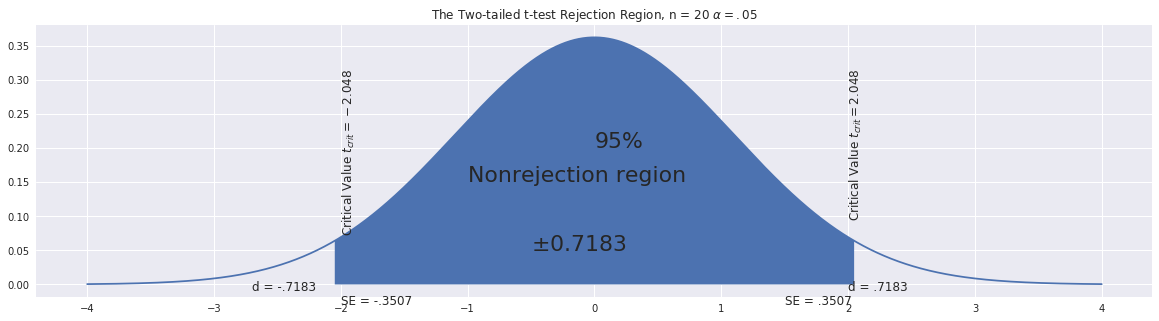

In [34]:
mu=0
sigma= 1.1
x = np.linspace(-4, 4, 5000)
y = ss.norm.pdf(x, mu, sigma)
P = plots.Plots(x,y)
fig2 = plt.figure(figsize=(20,5))
ax = fig2.add_subplot(1,1,1)
ax.plot(x,y)
ax.fill_between(x,y, where=(x < 2.048) & (x > -2.048))
ax.text(-2,.3, 'Critical Value ' + r'$t_{crit} = -2.048$', fontsize=12, rotation = 90)
ax.text(2,.3, 'Critical Value ' + r'$t_{crit} = 2.048$', fontsize=12, rotation = 90)
ax.text(0,.2, '95%', fontsize=22)
ax.text(-1,.15, 'Nonrejection region', fontsize=22)
ax.text(-.5,.05, r'$\pm 0.7183$', fontsize=22)
ax.text(-2.7,-.01, 'd = -.7183', fontsize=12, rotation = 0)
ax.text(2,-.01, 'd = .7183', fontsize=12, rotation = 0)
ax.text(-2.,-.03, 'SE = -.3507', fontsize=12, rotation = 0)
ax.text(1.5,-.03, 'SE = .3507', fontsize=12, rotation = 0)

ax.set_title('The Two-tailed t-test Rejection Region, n = 20 ' + r'$\alpha = .05$')
print('One Standard Deviation is .3507 minutes')

## Conclusion
- the margin of error is $\pm 0.7183$ minutes
- the 95% confidence interval estimate of the difference between the two call center call population means is $-0.11 \pm 0.7183$, -0.8283 minutes to 0.6083 minutes
- There is a 95% probability that this interval contains the true mean difference $\bar d$ between $\mu_1$ and $\mu_2$

# One more Video